In [434]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

pd.options.display.float_format = '{:,.2f}'.format

df_alc = pd.read_csv('./russia_alcohol.csv')
df_dem = pd.read_csv('./russian_demography.csv')

# 1. A look at the data

In [435]:
df_dem.head()

,year,region,npg,birth_rate,death_rate,gdw,urbanization
0,1990,Republic of Adygea,1.90,14.20,12.30,84.66,52.42
1,1990,Altai Krai,1.80,12.90,11.10,80.24,58.07
2,1990,Amur Oblast,7.60,16.20,8.60,69.55,68.37
3,1990,Arkhangelsk Oblast,3.70,13.50,9.80,73.26,73.63
4,1990,Astrakhan Oblast,4.70,15.10,10.40,77.05,68.01


In [410]:
df_dem.describe()

,year,npg,birth_rate,death_rate,gdw,urbanization
count,"2,380.00","2,317.00","2,317.00","2,315.00","2,330.00","2,330.00"
mean,"2,003.50",-2.34,11.55,13.90,68.47,69.15
std,8.08,6.06,3.23,3.50,10.45,13.35
min,"1,990.00",-15.90,6.20,3.20,37.50,23.63
25%,"1,996.75",-6.20,9.30,12.10,61.38,62.79
50%,"2,003.50",-3.10,11.00,14.10,68.53,69.58
75%,"2,010.25",0.70,13.00,16.10,76.90,77.62
max,"2,017.00",24.80,29.90,24.90,97.53,100.00


In [411]:
df_alc.head()

,year,region,wine,beer,vodka,champagne,brandy
0,1998,Republic of Adygea,1.90,8.80,3.40,0.30,0.10
1,1998,Altai Krai,3.30,19.20,11.30,1.10,0.10
2,1998,Amur Oblast,2.10,21.20,17.30,0.70,0.40
3,1998,Arkhangelsk Oblast,4.30,10.60,11.70,0.40,0.30
4,1998,Astrakhan Oblast,2.90,18.00,9.50,0.80,0.20


In [412]:
df_alc.describe()

,year,wine,beer,vodka,champagne,brandy
count,"1,615.00","1,552.00","1,557.00","1,554.00","1,552.00","1,549.00"
mean,"2,007.00",5.63,51.26,11.82,1.31,0.53
std,5.48,2.81,25.37,5.13,0.80,0.40
min,"1,998.00",0.10,0.40,0.05,0.10,0.00
25%,"2,002.00",3.58,32.40,8.30,0.80,0.20
50%,"2,007.00",5.40,49.97,11.50,1.20,0.40
75%,"2,012.00",7.38,67.40,15.00,1.67,0.70
max,"2,016.00",18.10,207.30,40.60,5.56,2.30


In [413]:
#Checking if the spelling of the regions is the same in all data sets:
print(df_dem.region.nunique())
print(df_alc.region.nunique())
print(set(df_dem.region).intersection(set(df_alc.region)))
print(set(df_dem.region).difference(set(df_alc.region)))

#Looking good.

85
85
{'Astrakhan Oblast', 'Karachay-Cherkess Republic', 'Ivanovo Oblast', 'Omsk Oblast', 'Republic of Bashkortostan', 'Tuva Republic', 'Republic of Tatarstan', 'Khanty–Mansi Autonomous Okrug – Yugra', 'Sverdlovsk Oblast', 'Tver Oblast', 'Moscow', 'Republic of North Ossetia-Alania', 'Republic of Karelia', 'Volgograd Oblast', 'Sakha (Yakutia) Republic', 'Primorsky Krai', 'Murmansk Oblast', 'Lipetsk Oblast', 'Kostroma Oblast', 'Orenburg Oblast', 'Mari El Republic', 'Chechen Republic', 'Saratov Oblast', 'Kursk Oblast', 'Vladimir Oblast', 'Republic of Buryatia', 'Republic of Adygea', 'Saint Petersburg', 'Republic of Khakassia', 'Arkhangelsk Oblast', 'Kabardino-Balkar Republic', 'Kamchatka Krai', 'Moscow Oblast', 'Bryansk Oblast', 'Oryol Oblast', 'Tambov Oblast', 'Tula Oblast', 'Tomsk Oblast', 'Kirov Oblast', 'Udmurt Republic', 'Chelyabinsk Oblast', 'Novosibirsk Oblast', 'Republic of Dagestan', 'Komi Republic', 'Kemerovo Oblast', 'Altai Republic', 'Novgorod Oblast', 'Pskov Oblast', 'Ulyanov

# 2. Prepare dataset

In [414]:
df = pd.merge(df_dem, df_alc, how='inner', on=['year','region'])
#df.drop(["gdw","npg"], axis = 1, inplace = True) #gdw, npg not used in analysis
df.head()

,year,region,npg,birth_rate,death_rate,gdw,urbanization,wine,beer,vodka,champagne,brandy
0,1998,Republic of Adygea,-4.30,9.60,13.90,83.33,53.05,1.90,8.80,3.40,0.30,0.10
1,1998,Altai Krai,-4.00,8.80,12.80,72.67,52.76,3.30,19.20,11.30,1.10,0.10
2,1998,Amur Oblast,-1.80,10.40,12.20,65.59,66.07,2.10,21.20,17.30,0.70,0.40
3,1998,Arkhangelsk Oblast,-4.20,9.10,13.30,68.28,74.30,4.30,10.60,11.70,0.40,0.30
4,1998,Astrakhan Oblast,-3.70,9.60,13.30,73.76,68.13,2.90,18.00,9.50,0.80,0.20


In [415]:
df.describe()

,year,npg,birth_rate,death_rate,gdw,urbanization,wine,beer,vodka,champagne,brandy
count,"1,615.00","1,578.00","1,578.00","1,576.00","1,581.00","1,581.00","1,552.00","1,557.00","1,554.00","1,552.00","1,549.00"
mean,"2,007.00",-2.61,11.78,14.40,64.80,69.23,5.63,51.26,11.82,1.31,0.53
std,5.48,6.15,3.24,3.54,8.77,13.29,2.81,25.37,5.13,0.80,0.40
min,"1,998.00",-15.90,6.20,3.30,37.50,24.58,0.10,0.40,0.05,0.10,0.00
25%,"2,002.00",-6.50,9.60,12.80,59.47,62.90,3.58,32.40,8.30,0.80,0.20
50%,"2,007.00",-3.40,11.20,14.60,64.91,69.60,5.40,49.97,11.50,1.20,0.40
75%,"2,012.00",0.47,13.30,16.40,70.86,77.62,7.38,67.40,15.00,1.67,0.70
max,"2,016.00",24.80,29.90,24.90,89.95,100.00,18.10,207.30,40.60,5.56,2.30


In [315]:
np.sum(df.isnull())

year             0
region           0
npg             37
birth_rate      37
death_rate      39
gdw             34
urbanization    34
wine            63
beer            58
vodka           61
champagne       63
brandy          66
dtype: int64

In [407]:
drink_cat = ["wine","beer","vodka","champagne","brandy"]
df["total_volume"] = df[drink_cat].sum(axis=1)


KeyError: "['champagne', 'brandy'] not in index"

# 3. Analysis

## 3.1 Alcohol sales numbers

### a. What are the average volumes of different alcohol types in Russia per capita ?

In [355]:
df_data = df.groupby(['year'], as_index=False).mean() #yearly average across all regions
df_data.set_index("year", inplace=True)
df_data.head()

,npg,birth_rate,death_rate,gdw,urbanization,wine,beer,vodka,champagne,brandy,total_volume
year,,,,,,,,,,,
1998,-3.66,9.49,13.15,73.00,68.88,3.03,20.42,12.67,0.91,0.23,35.51
1999,-5.32,8.97,14.28,70.97,68.98,3.12,25.40,13.47,0.85,0.21,41.02
2000,-5.60,9.32,14.93,68.52,68.89,3.34,30.13,13.57,0.89,0.23,45.91
2001,-5.61,9.69,15.30,66.18,68.95,3.94,36.34,14.24,0.93,0.28,53.76
2002,-5.69,10.31,16.00,64.65,69.07,4.40,42.38,14.79,0.97,0.32,60.64


In [356]:
fig = px.bar(df_data, x=df_data.index, y=drink_cat, 
             title="...")
fig.show()

In [357]:
#Since brandy and champange are almost negligable in comparisson to the other types let's take a look at the chart without them:

drink_cat_simple = ["wine","beer","vodka"]
fig = px.bar(df_data, x=df_data.index, y=drink_cat_simple)
fig.show()

#### It seems that the total alcohol volume peaked at arroung the turn of the decade and is in a steady decline since then. This is apparent in all categories. However, the volume of beer in 2016 is larger in 2016 than in 1998, while with vodka it is the opposite case. Also a look at the numbers reveales that in 1998 on average there was 12.7l of vodka sold per capita compared to 20.4l of beer (keep in my that vodka is normaly 40% alcohol and beer aroung 5%). This raises the next question...

### b. What is the average yearly distribution of alcohol types (1998-2016)?

In [358]:
df_data_per = df_data[drink_cat].div(df_data.total_volume, axis = 0) * 100

In [359]:
fig = px.bar(df_data_per , x=df_data_per.index, y=drink_cat)
fig.show()

#### It seems that while the percentage of wine, champagne and brandy is not very different over the years, beer and vodka are competing heavily and beer is winning! 

### c. What are the regional differences in reference to total alcohol sales?

In [360]:
df_region = df.groupby(['region'], as_index=False).mean() #yearly average across all regions
df_region.drop(["year"], inplace = True, axis = 1)

In [361]:
df_region

,region,npg,birth_rate,death_rate,gdw,urbanization,wine,beer,vodka,champagne,brandy,total_volume
0,Altai Krai,-3.41,11.32,14.82,65.87,54.18,3.17,48.37,9.47,1.21,0.24,62.46
1,Altai Republic,5.51,18.24,12.81,68.82,27.05,5.19,36.72,9.68,0.93,0.25,52.79
2,Amur Oblast,-2.41,12.43,14.96,60.80,66.60,5.22,53.38,14.22,1.12,0.40,74.33
3,Arkhangelsk Oblast,-3.92,11.17,15.16,63.21,75.45,8.67,47.04,17.38,1.63,0.87,75.59
4,Astrakhan Oblast,-0.93,12.83,13.72,65.41,67.28,4.47,54.70,9.30,0.86,0.36,69.68
...,...,...,...,...,...,...,...,...,...,...,...,...
80,Vologda Oblast,-5.04,11.43,16.48,66.60,69.79,9.33,67.21,17.22,0.86,0.52,95.13
81,Voronezh Oblast,-7.91,9.24,17.02,71.10,63.22,4.64,54.91,9.92,1.50,0.40,71.37
82,Yamalo-Nenets Autonomous Okrug,8.98,14.47,5.55,42.53,84.04,5.31,80.14,15.09,1.49,0.95,102.98
83,Yaroslavl Oblast,-7.68,9.94,17.70,69.55,81.39,7.19,63.33,14.94,1.24,0.57,87.28


In [362]:
fig = px.bar(df_region, x='region', y="total_volume").update_xaxes(categoryorder="total descending")
fig.show()

#### Let's zoom into the top 5 regions:

In [363]:
fig = px.bar(df_region.sort_values(by = ["total_volume"], ascending = False).head(10), x='region', y="total_volume")#.update_xaxes(categoryorder="total descending")
fig.show()

#### It isn't surprising that the two regions with most alcohol sales are Moscow and Saint-Petersburg, but it is however interessing thate the following few regions are very remote regions such as Yamalo-Nenets Autonomous Okrug or the Komi republic have in generall a lower standard. (Maybe on outlook would be to check out the standard of living in these remote regions, commons sense would tell me that climate difference possible also play a role.)

In [364]:
fig = px.bar(df_region.sort_values(by = ["total_volume"], ascending = True).head(10), x='region', y="total_volume")#.update_xaxes(categoryorder="total descending")
fig.show()

#### The republic with the lowest alcohol sales per capita is the Chechen Republic. Not surprising since the population is predominantly muslim (95% according to wikipedia). Similar goas for the other five regions with the lowest alcohol sales.

## 3.2 A look at the demographic data

In [365]:
fig = px.line(df_data, x=df_data.index, y="urbanization", 
             title="...")
fig.show()

In [366]:
fig = px.line(df_data, x=df_data.index, y="npg", 
             title="...")
fig.show()

## 3.3 Comparing demographic data with alcohol sales

In [367]:
fig = px.bar(df_region, x='region', y="urbanization", color = "total_volume").update_xaxes(categoryorder="total descending")
fig.show()

In [378]:
fig = px.bar(df_region, x='region', y="npg", color = "total_volume").update_xaxes(categoryorder="total descending")
fig.show()

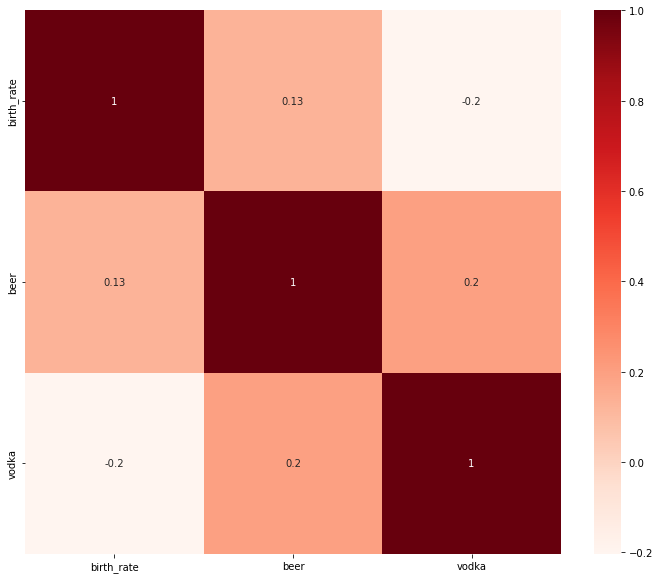

In [432]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
df_1 = df.drop(["death_rate","wine","urbanization","year", "region","gdw","champagne","brandy", "npg"], axis = 1)
cor = df_1.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

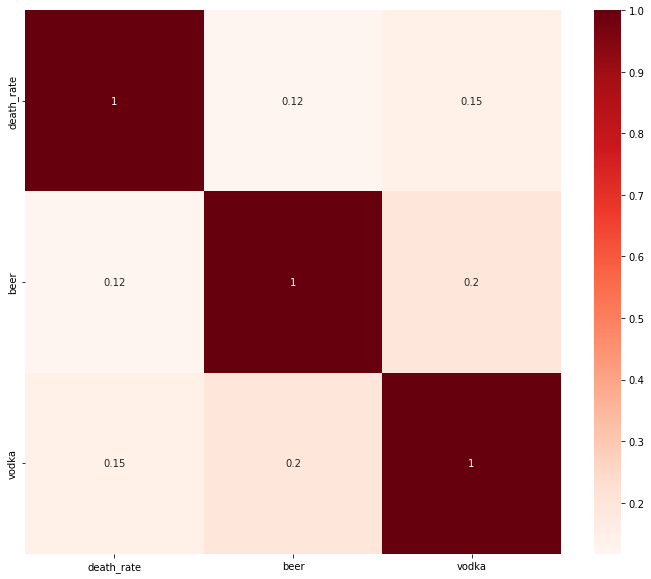

In [431]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
df_2 = df.drop(["birth_rate","wine","urbanization","year", "region","gdw","champagne","brandy", "npg"], axis = 1)
cor = df_2.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

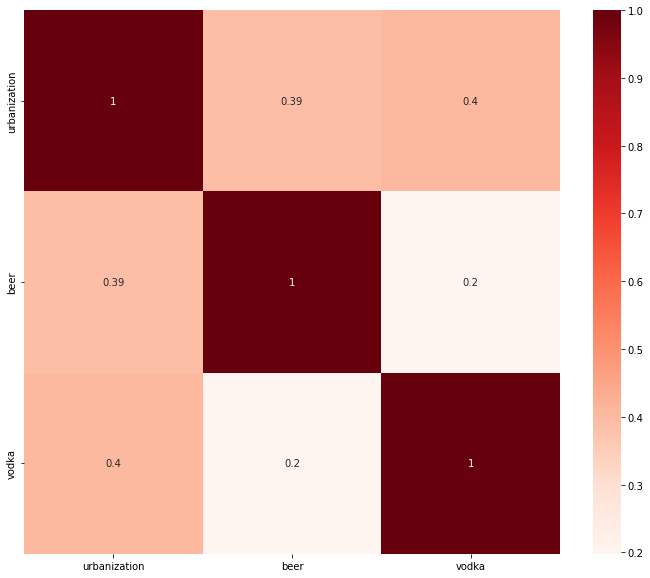

In [433]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
df_3 = df.drop(["birth_rate","wine","death_rate","year", "region","gdw","champagne","brandy", "npg"], axis = 1)
cor = df_3.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

## Appendix: Urbanization and Acohol sales

In [296]:
fig = px.bar(df_region, x='region', y="total_volume", color = "urbanization").update_xaxes(categoryorder="total descending")
fig.show()